#**Modern Statistics**
###**Final Project - Supervised learning**
#### David Guedalia - 208505883, Hamza Abuleil - 322363300
😀
🏅

##Udacity ML Charity Competition from Kaggle

#Import

In [101]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load dataset

In [103]:
train_charity = pd.read_csv('/content/drive/MyDrive/charity/census.csv')
test_charity = pd.read_csv('/content/drive/MyDrive/charity/test_census.csv')

#Label - y

In [104]:
train_charity['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [105]:
train_charity[train_charity['income'] == '<=50K'].shape[0]

34014

In [106]:
train_charity[train_charity['income'] == '>50K'].shape[0]

11208

In [107]:
dict_income = {'<=50K': 0, '>50K': 1}
y_train = train_charity['income'].map(dict_income)
train_charity['income'] = train_charity['income'].map(dict_income)

#Descriptive Train and Test dataset

In [108]:
train_charity.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0


In [109]:
train_charity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 4.8+ MB


In [110]:
test_charity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       45222 non-null  int64  
 1   age              45205 non-null  float64
 2   workclass        45200 non-null  object 
 3   education_level  45202 non-null  object 
 4   education-num    45208 non-null  float64
 5   marital-status   45201 non-null  object 
 6   occupation       45200 non-null  object 
 7   relationship     45206 non-null  object 
 8   race             45203 non-null  object 
 9   sex              45203 non-null  object 
 10  capital-gain     45207 non-null  float64
 11  capital-loss     45205 non-null  float64
 12  hours-per-week   45209 non-null  float64
 13  native-country   45206 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


In [111]:
test_charity = test_charity.drop('Unnamed: 0', axis=1)

In [112]:
for column in train_charity.columns:
    print(column, len(train_charity[column].unique()))

age 74
workclass 7
education_level 16
education-num 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
capital-gain 121
capital-loss 97
hours-per-week 96
native-country 41
income 2


In [113]:
categorial_vars = [x for x in train_charity.columns if train_charity[x].dtype == 'object']
categorial_vars

['workclass',
 'education_level',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [114]:
numeric_vars = [x for x in train_charity.columns if x not in categorial_vars]
numeric_vars

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


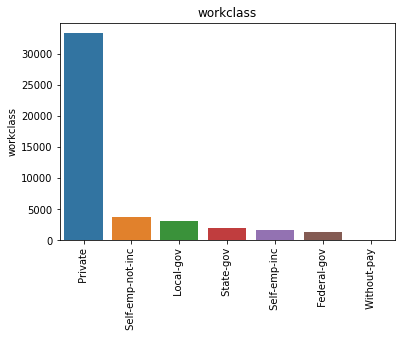

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


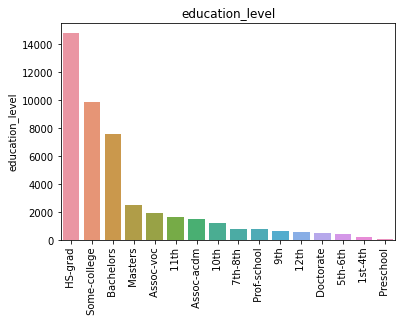

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


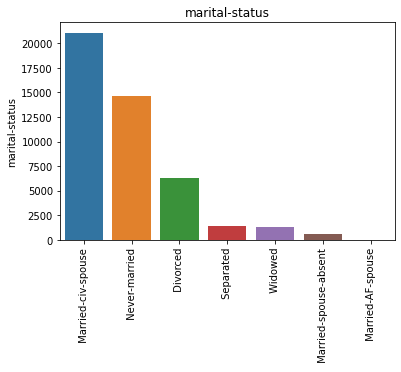

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


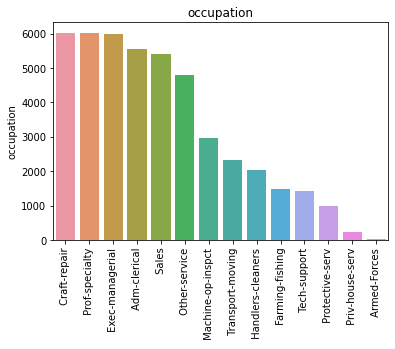

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


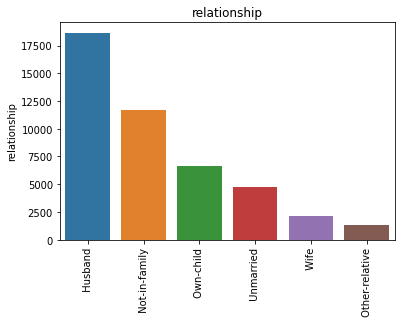

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


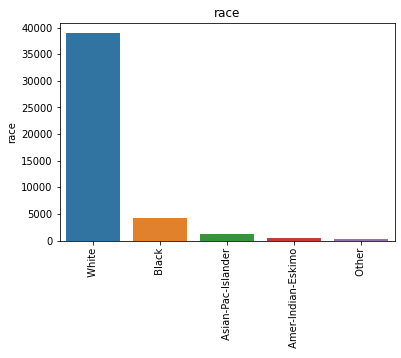

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


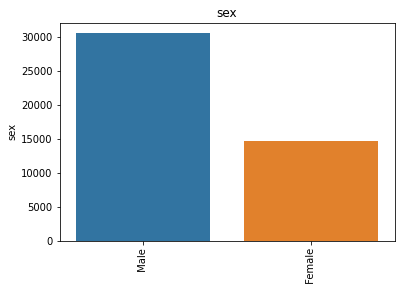

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


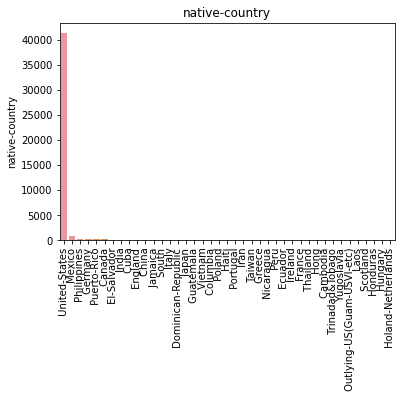

In [115]:
for cat in categorial_vars:
    sns.barplot(train_charity[cat].value_counts().index, train_charity[cat].value_counts())
    plt.title(cat)
    plt.xticks(rotation=90)
    plt.show()

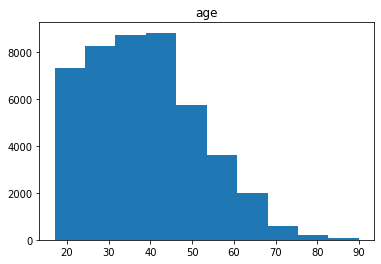

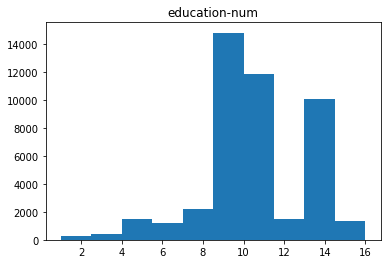

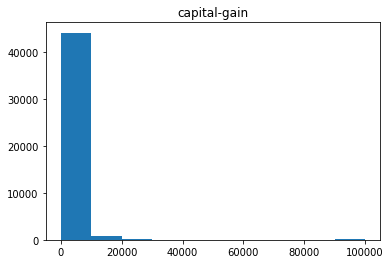

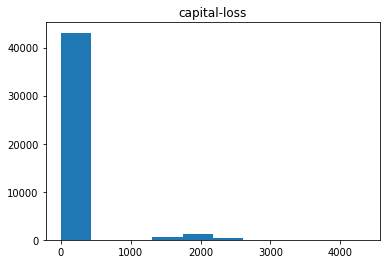

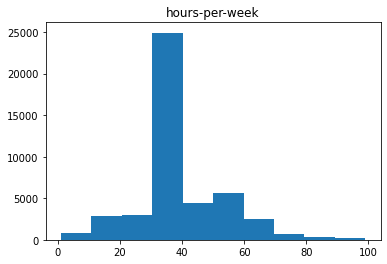

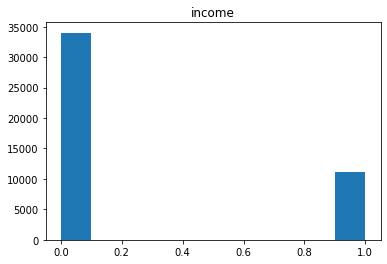

In [116]:
for i in numeric_vars:
    plt.hist(train_charity[i])
    plt.title(i)
    plt.show()

As we can see on the histogram of capital-gain and capital-loss Using a log transformation significantly reduces the range of values caused by outliers.

In [117]:
train_charity['capital-gain'] = train_charity['capital-gain'].apply(lambda x: np.log(x + 1))
test_charity['capital-gain'] = test_charity['capital-gain'].apply(lambda x: np.log(x + 1))

In [118]:
train_charity['capital-loss'] = train_charity['capital-loss'].apply(lambda x: np.log(x + 1))
test_charity['capital-loss'] = test_charity['capital-loss'].apply(lambda x: np.log(x + 1))

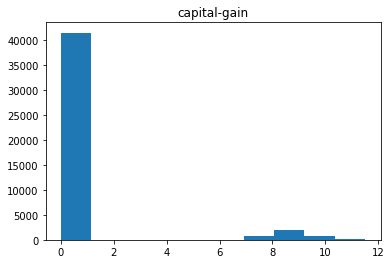

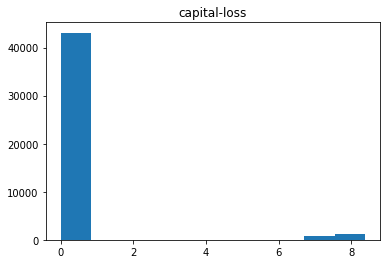

In [119]:
for i in ['capital-gain', 'capital-loss']:
    plt.hist(train_charity[i])
    plt.title(i)
    plt.show()

#Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


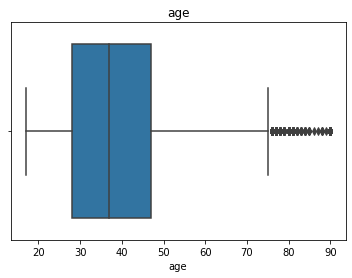

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


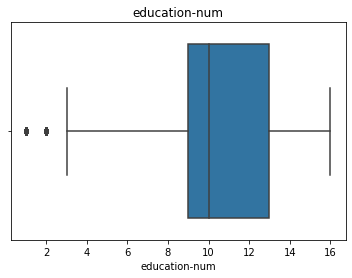

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


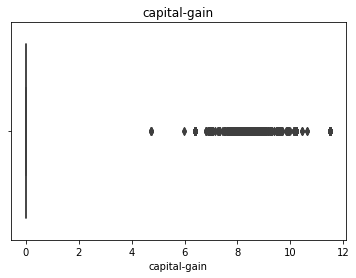

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


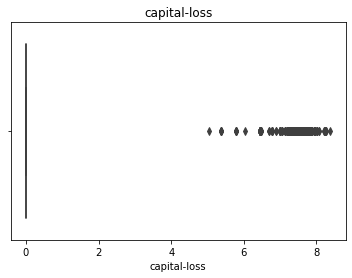

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


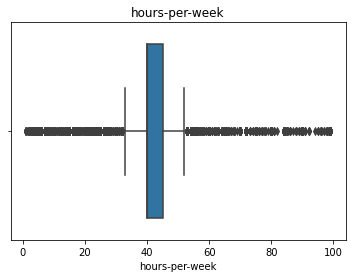

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


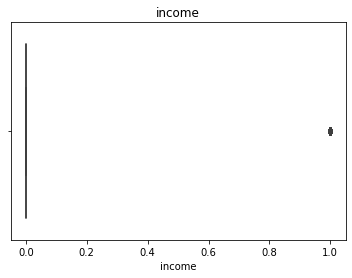

In [120]:
for column in numeric_vars:
    sns.boxplot(train_charity[column])
    plt.title(column)
    plt.show()

We can see from the graphs that all continues features have outliers. We decided to keep the outliers without preprocessing them, as we using also algorithems that based on tree models.

#Normalize

Normalizing numerical features is important for a lot of algorithms.
We will use MinMaxScaler from sklearn

In [121]:
train_charity = train_charity.drop('income', axis=1)
numeric_vars.remove('income')

In [122]:
def normalize(df):
    min_max = MinMaxScaler()
    df = min_max.fit_transform(df[numeric_vars])
    return df

In [123]:
train_charity[numeric_vars]= normalize(train_charity)
test_charity[numeric_vars]= normalize(test_charity)

#Missing values

In [124]:
print("Number of missing values test - Age: ", test_charity['age'].isnull().sum())
test_charity['age']= test_charity['age'].fillna(train_charity['age'].mean())

Number of missing values test - Age:  17


In [125]:
print("Number of missing values test - 'education-num': ", test_charity['education-num'].isnull().sum())
test_charity['education-num']= test_charity['education-num'].fillna(train_charity['education-num'].mean())

Number of missing values test - 'education-num':  14


In [126]:
print("Number of missing values test - 'hours-per-week': ", test_charity['hours-per-week'].isnull().sum())
test_charity['hours-per-week']= test_charity['hours-per-week'].fillna(train_charity['hours-per-week'].mean())

Number of missing values test - 'hours-per-week':  13


In [127]:
print("Number of missing values test - 'capital-gain': ", test_charity['capital-gain'].isnull().sum())
test_charity['capital-gain']= test_charity['capital-gain'].fillna(train_charity['capital-gain'].median())

Number of missing values test - 'capital-gain':  15


In [128]:
print("Number of missing values test - 'capital-loss': ", test_charity['capital-loss'].isnull().sum())
test_charity['capital-loss']= test_charity['capital-loss'].fillna(train_charity['capital-loss'].median())

Number of missing values test - 'capital-loss':  17


##Categorial

In [129]:
categorial_vars

['workclass',
 'education_level',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [130]:
for col in categorial_vars:
    print("Number of missing values test - ", col ,": ", test_charity[col].isnull().sum())
    test_charity[col]= test_charity[col].fillna(train_charity[col].mode())

Number of missing values test -  workclass :  22
Number of missing values test -  education_level :  20
Number of missing values test -  marital-status :  21
Number of missing values test -  occupation :  22
Number of missing values test -  relationship :  16
Number of missing values test -  race :  19
Number of missing values test -  sex :  19
Number of missing values test -  native-country :  16


We fill the nan values with the most popular value.

#Encoding Categorial Values

In [131]:
train_charity

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,Private,Bachelors,0.800000,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,0.397959,United-States
45218,0.301370,Private,Bachelors,0.800000,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,0.357143,United-States
45219,0.287671,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,0.500000,United-States
45220,0.369863,Private,Bachelors,0.800000,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.747375,0.0,0.397959,United-States


In [132]:
le = LabelEncoder()
train_charity_le = train_charity[:]
test_charity_le = train_charity[:]
for col in categorial_vars:
    label = le.fit_transform(train_charity_le[col])
    train_charity_le.drop(col, axis=1, inplace=True)
    train_charity_le[col] = label
    label = le.fit_transform(test_charity_le[col])
    test_charity_le.drop(col, axis=1, inplace=True)
    test_charity_le[col] = label

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


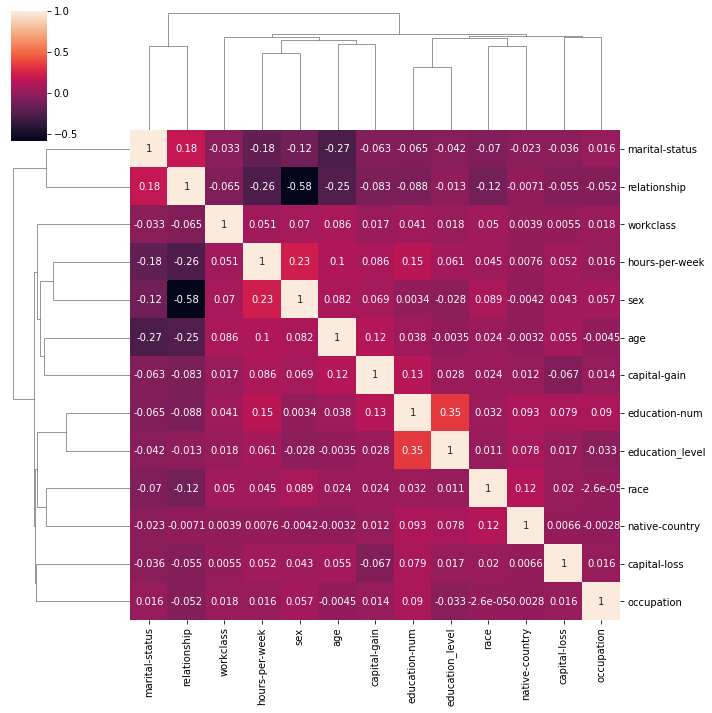

In [133]:
sns.clustermap(train_charity_le.corr(),vmax=1.0,annot=True)

In [134]:
for col in categorial_vars:
    train_charity = pd.concat([train_charity, pd.get_dummies(train_charity[col], drop_first = True)], axis =1)
    test_charity = pd.concat([test_charity, pd.get_dummies(test_charity[col], drop_first = True)], axis =1)
train_charity = train_charity.drop(categorial_vars, axis=1)
test_charity = test_charity.drop(categorial_vars, axis=1)

In [135]:
train_charity

,age,education-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.219178,0.800000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,0.301370,0.800000,0.000000,0.0,0.357143,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,0.287671,0.800000,0.000000,0.0,0.500000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45220,0.369863,0.800000,0.747375,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#Predict

Looking for the best parameters using cross validation

In [136]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000,random_state= 42)
penalty = ['l1', 'l2']

C = np.logspace(-2, 2, 10)
kfold = StratifiedKFold(n_splits=6)

lr_param_grid = {'C': C}
clf = GridSearchCV(LogisticRegression(), lr_param_grid)
gsLR = GridSearchCV(LR, param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs = 4, verbose = 1)
gsLR.fit(train_charity, y_train)

LR_best = gsLR.best_estimator_

print("Best penalty:", LR_best.get_params()['penalty'])
print("Best C:", LR_best.get_params()['C'])

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best penalty: l2
Best C: 0.21544346900318834


In [178]:
logistic_model = LogisticRegression(max_iter=1000, C=0.2, penalty='l2', solver='liblinear')
logistic_model.fit(train_charity, y_train)
pred = logistic_model.predict(test_charity)
submission = pd.DataFrame({'id' : test_charity.index,'income' : pred})

In [179]:
submission

,id,income
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
45217,45217,0
45218,45218,0
45219,45219,0
45220,45220,1


In [139]:
submission.to_csv("submission.csv", index=False)

Kaggle Score: 0.76190

I found that 6 depth was the best parameter for gradient boosting

In [180]:
gradient_boosting = GradientBoostingClassifier(max_depth=6)
gradient_boosting.fit(train_charity,y_train)
pred_boosting = gradient_boosting.predict(test_charity)
submission_boosting = pd.DataFrame({'id' : test_charity.index,'income' : pred_boosting})

In [181]:
submission_boosting.to_csv("submission_boosting.csv", index=False)

Kaggle Score: 0.81364

We can conclude that the best performance were by the gradient boosting algorithem with the parameter 6 as the max depth was the best with *0.813* accuracy!

🙏
